# Adapted Histograms

Matplotlib's **hist** function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" parameter. By default, each data point is given a weight of 1, so that the sum of point weights in each bin is equal to the number of points. If we change the weights to be a representative function of each point's value on a second variable, then the sum will end up representing something other than a count.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [24]:
df.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

Text(0,0.5,'mean(comb)')

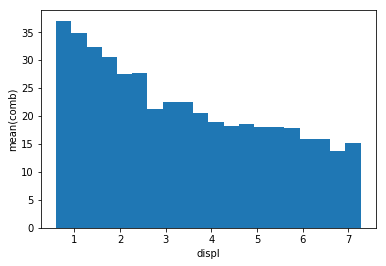

In [88]:
bin_edges=np.arange(df.displ.min(), df.displ.max()+1/3, 1/3)

# to associate each data point to a particular bin (bin_idxs)
bin_idxs=pd.cut(df.displ, bin_edges, right=False, include_lowest=True, labels=False).astype(int)

# count number of points in each bin 
pts_per_bin = df.groupby(bin_idxs).size()

num_var_wts = df['comb'] / pts_per_bin[bin_idxs].values

# plot the data using the calculated weights
plt.hist(data = df, x = 'displ', bins = bin_edges, weights = num_var_wts)
plt.xlabel('displ')
plt.ylabel('mean(comb)')

To get the mean of the y-variable ("comb") in each bin, the weight of each point should be equal to the y-variable value, divided by the number of points in its x-bin (num_var_wts). As part of this computation, we make use of pandas' cut function in order to associate each data point to a particular bin (bin_idxs). The **labels = False** parameter means that each point's bin membership is associated by a numeric index, rather than a string. We use these numeric indices into the **pts_per_bin**, with the .values at the end necessary in order for the Series' indices to not be confused between the indices of df['comb'].

This plot shows that the average outcome of the y-variable "comb" generally decreases across values of the x-variable "displ".